# Workshop: **TransitSim 4.0 Demonstration**

Welcome to our workshop on TransitSim 4.0 with RAPTOR! Today, we'll delve into the functionalities and applications of TransitSim 4.0 with RAPTOR, guiding you on how to harness its capabilities for transit modeling.

## Copyright and License Information

© September 2023 Huiying ("Fizzy") Fan, Hanyan ("Ann") Li, Diyi Liu, Angshuman Guin, Randall Guensler, Georgia Institute of Technology. All rights reserved.

This material is for personal use and is protected by law. Reproduction or distribution without explicit permission is prohibited.

## Acknowledgements

The development of TransitSim 4.0 was funded by the National Center for Sustainable Transportation, under the Federal Highway Administration. The authors would like to extend their gratitude to the following researchers and teams, whose work significantly influenced parts of this program:

##### 1. **Delling, D., Pajor, T., & Werneck, R. F.**
- **Work**: *Round-based Public Transit Routing*. Transportation Science, 49(3), 591-604, 2015.
- **Contribution**: This seminal paper introduced innovative round-based techniques for public transit routing, offering insights and methodologies that have been instrumental in shaping the algorithms and approaches used in this project.

##### 2. **Agarwal, P. & Rambha, T.**
- **Work**: [Transit Routing on GitHub](https://github.com/transnetlab/transit-routing)
- **Contribution**: Their combined expertise in transportation routing and the pre-processing of GTFS files for the RAPTOR algorithm has been invaluable to this project.

##### 3. **Fan, H., Guin, A., & Guensler, R.**
- **Work**: *Using Multi-Modal Path-Specific Transit Trips in Transportation Social Sustainability Analysis: Case Study in Atlanta, GA*
- **Contribution**: Their research report on TransitSim 3.0 algorithms served as another significant building block for trajectory processing and analysis.

##### 4. **Li, H., Liu, D., Guin, A., & Guensler, R.**
- **Work**: *TransitSim 1.0-2.0*
- **Contribution**: Their work on the TransitSim software laid the foundation with algorithms and methodologies that were pivotal for the development and optimization of this project.

##### 5. **Passmore, R., Watkins, K. E., & Guensler, R.**
- **Work**: *BikewaySim and Complete Paths Networks are Expected to Improve Modeling of Bicycle Activity and Route Choice*
- **Contribution**: Their research has guided the current project in the selection of algorithms and various processing functionalities.

##### 6. **Fan, H., Lu, H., Dai, Z., Passmore, R., Guin, A., Watkins, K., & Guensler, R.**
- **Work**: *Combined Effect of Changes in Transit Service and Changes in Occupancy on Per-Passenger Energy Consumption*
- **Contribution**: This study has enhanced the methodology, especially in relation to TransitSim 1.0 and 2.0.

##### 7. **Passmore, R., Fan, H., & Guensler, R.**
- **Work**: *Shortest Path Routing Lab. CEE/CP6702 Urban Transportation Lab [lecture]. Georgia Institute of Technology*
- **Contribution**: This lecture provided the sample trips dataset that was utilized in the current project.


## Table of Contents

1. **Setup, Installation, and Required Packages**
2. **Understanding the Basics and Folder Structure**
3. **GTFS Pre-processing and Analysis Module**
4. **RAPTOR Transit Routing Module**
5. **Post-Analysis Module**

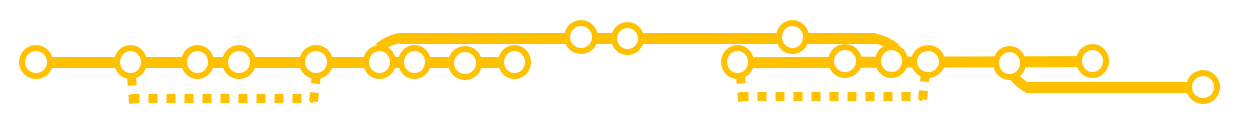

## 1. **Setup, Installation, and Required Packages**

Before diving into the functionalities of TransitSim 4.0, it's essential to set up our environment correctly. This involves installing necessary packages and importing the required libraries. The following sections guide you through this process.

### Required Packages

#### Data Analysis and Manipulation

- **Numpy and Pandas**: Fundamental libraries for numerical operations and data manipulation in Python. They provide essential data structures and methods to perform efficient operations on data.
  
- **NetworkX**: Enables the creation, manipulation, and study of complex networks of nodes and edges.

#### Parallel Processing and Performance

- **Multiprocessing, psutil, and related imports**: These libraries help in parallelizing tasks, making the most of multi-core CPUs, and managing system processes.

- **tqdm**: Provides a progress bar, which is useful for tasks that take a significant amount of time, giving a visual indication of progress.

#### Geospatial Analysis

- **GeoPandas, Shapely, geopy, and rasterio**: Essential for geospatial data manipulation, analysis, and operations. They allow for operations on geometric shapes, geospatial computations, and raster data handling.

#### Visualization

- **Matplotlib, Seaborn, contextily, cmocean, and related imports**: Comprehensive libraries for creating static, animated, and interactive visualizations in Python. They offer a wide range of plotting tools and customization options.

- **SciPy and Astropy**: Used for more advanced image and signal processing tasks, such as convolution and filtering.


### Installing Required Packages

To ensure smooth execution of the subsequent code, we need to install a specific package. While it's highly recommended to do so in a new environment on conda, the following command provides a workaround for quick installation of any missing documents:

```python
%pip install [package name]
```

### Importing the packages

In [ ]:
import os 
import time
import numpy as np
import pandas as pd
import networkx as nx

import multiprocessing
from multiprocessing import Pool
from functools import partial
import psutil
from tqdm import tqdm
import itertools
from itertools import chain
from math import ceil

from random import shuffle
from time import time as time_measure
from time import time
import pickle

import geopandas as gpd
from shapely.geometry import LineString
import geopy
from geopy.distance import geodesic
# import rasterio

# visualization
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.patches import Arrow
from matplotlib.patches import FancyArrow
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
import matplotlib.colors as colors
import matplotlib.image as mpimg
import matplotlib.font_manager as fm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib_scalebar.scalebar import ScaleBar
from geodatasets import get_path
import contextily as ctx
import cmocean
import seaborn as sns

from scipy.ndimage.filters import gaussian_filter
from astropy.convolution import convolve, Gaussian2DKernel

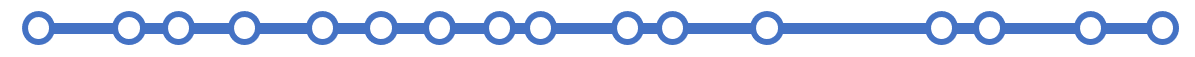

## 2. **Understanding the Basics and Folder Structure**
Our TransitSim project is organized to ensure clarity and ease of access. Below is a detailed breakdown of the main directories and their contents:


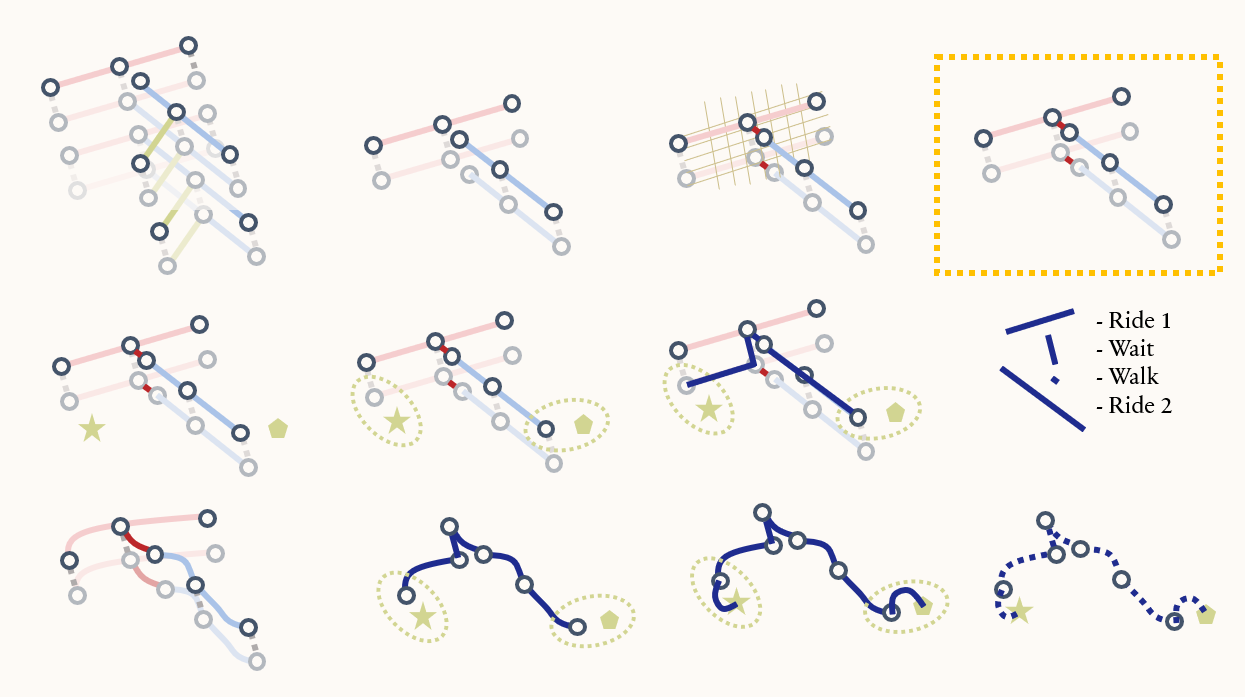

### Folder Structure

#### `TransitSim4/`
The root directory for our project.

- **`data/`**: This directory is designated for storing raw input data and crucial outputs intended for future analyses.
  - **`gtfs/`**: Contains input GTFS data. GTFS (General Transit Feed Specification) is a standard proposed by Google for transit agencies to share their network configurations. It provides a consistent format for developers and researchers to work with transit data. This open-source data can be downloaded from [TransitFeeds.com](http://transitfeeds.com/).
  - **`gtfs/`**: The location where you want to put your O-D trips samples (can be multiple CSV files).
  - **`transfer_network/`**: Houses the transfer network data, such as bike, sidewalk, auto, etc. The current version utilizes data from OpenStreetMap (OSM).
  - **`output/`**: Direct outputs from the RAPTOR algorithm are stored here. This includes:
    - A summary file detailing travel time and distance at the trip level.
    - A paths file containing detailed trip trajectory information on a link-by-link basis.
    - A log file reporting any issues encountered.
  - **`postproc/`**: Contains detailed trajectories derived from the output file, with a separate file for each trip.
    - **`trajectories/`**: Detailed trip-level trajectories.
    - **`traj_integrated/`**: Trajectories with ingress and egress integrated.
    - **`traj_sec_by_sec/`**: Second by second trajectories.
    - **`linkshp/`**: Houses the shapefile for detailed transit network information.
    - **`linkpts/`**: Houses the shapefile for transit and transfer network sampled to points.

- **`scratch/`**: A directory for temporary files. These files can be safely deleted once the project concludes.
  - **`gtfs_output/`**: Houses the pre-processed GTFS files.
  - **`transfer_output/`**: Contains processed transfer information.
  - **`dicts/`**: Stores processed input dictionaries.
  - **`sample_processed/`**: Stores interim files for processing trips sample files.
  - **`f_l_path/`**: Stores ingress and egress paths.

- **`program/`**: This is where all the program scripts reside.
  - **`gtfs_wrapper.py`**: GTFS pre-processing scripts sourced from Prateek's group.
  - **`gtfs_filter.py`**: Our added GTFS filtering scheme.
  - **`build_transfer_file.py`**: Transfer processing script from Prateek's group.
  - **`dict_builder_functions.py`**: Dictionary building functions from Prateek's group.
  - **`raptor_preproc.py`**: Compiled RAPTOR pre-processing module.
  - **`raptor_functions.py`**: Ancillary functions for RAPTOR.
  - **`std_raptor.py`**: RAPTOR function.
  - **`raptor_run.py`**: Compiled RAPTOR running module.
  - **`transit_links.py`**: Post-processing to obtain detailed trajectory of transit links.
  - **`f_l_mile.py`**: Post-processing to obtain first and last mile (ingress and egress) travel information.
  - **`postproc_traj.py`**: Compiled RAPTOR post-processing module.
  - **`extensions.py`**: Compiled extension module.


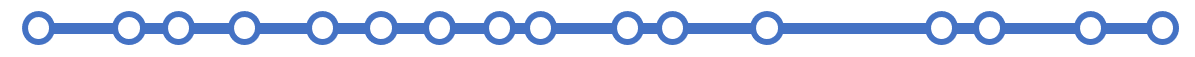

## 3. **GTFS Pre-processing and Analysis Module**
This module provides a comprehensive set of functions to preprocess and analyze General Transit Feed Specification (GTFS) data. The module is designed to facilitate transit modeling and analysis, especially in the context of walkability, transfer optimization, and network analysis.

### Key Features

1. **GTFS Data Import and Basic Filtering**: 
    - Import essential GTFS files such as stops, trips, and stop times.
    - Spatially filter GTFS data based on sample locations.
    - Filter trips based on specific days and routes.

2. **Network Preparation**:
    - Generate a walkable network from OpenStreetMap (OSM) based on the spatial extent of GTFS stops.
    - Identify nearby stops within a walkable threshold.
    - Filter out stops that belong to the same route to avoid redundant transfers.

3. **Transfer Analysis**:
    - Identify potential transfer opportunities between stops.
    - Compute the shortest path between stops using the prepared network.
    - Apply transitive closure to the graph to optimize transfer paths.

4. **Dictionary Construction for Fast Lookup**:
    - Construct and save dictionaries for routes by stops, stops, stop times, and footpaths for efficient data retrieval during analysis.

In [ ]:
from program import raptor_preproc

### Key Libraries and Dependencies

This module requires the following packages:
- **Pandas & Numpy**: For data manipulation and mathematical operations.
- **GeoPandas & Geopy**: For spatial operations and geospatial data handling.
- **NetworkX**: For network analysis and graph operations.
- **OSMnx**: For obtaining and processing OpenStreetMap data.
- **TQDM**: For progress bars during data processing.

This module is built upon the following two functions from [This GitHub Site](https://github.com/transnetlab/transit-routing)
- **GTFS Wrapper**: Pre-processing of GTFS files.
- **dict_builder_functions**: Building dictionary files for fast processing.

### Data Preparation

To utilize this module, ensure you have the necessary GTFS data and a trips dataset for spatial filtering (if required). Follow the sequence of function calls as outlined in the code to preprocess the GTFS data, prepare the network, identify transfer opportunities, and construct the necessary dictionaries for further analysis.
n:
1. **GTFS Files**: Ensure you have the desired version of GTFS files. At a minimum, the dataset should contain stops, stop times, trips, routes, shapes, calendar, and calendar dates.
2. **OD Trips Data**: This dataset comprises one or more CSV files with OD trips information. At the very least, the CSV should include the following columns: trip_id, ori_lat, ori_lon, dest_lat, dest_lon, and board_time.
3. **Transfer Network Data** (Optional): If provided, this dataset should contain a shapefile for nodes and another for edges, representing the transfer network. If not available, you can supply a network name (e.g., "Atlanta, Georgia, USA") and ensure the `osmnx` package is installed to extract the transfer network from OSM. If your study area doesn't align with the administrative boundaries of a specific region, you have the option to define the boundary based on the spatial information in your GTFS data. More details on this are available in the corresponding script.


In [ ]:
# Define paths for input datasets
SAMP_PATH = './data/sample'  # Path to the trips data
RAW_GTFS_PATH = './data/gtfs'  # Path to the raw GTFS data
RAW_NETWORK_PATH = './data/transfer_network'  # Path to the raw transfer network data
NETWORK_NAME = 'Atlanta, Georgia, USA'  # Name of the network for OSM extraction (if needed)

# Define paths for output datasets
PROC_GTFS_PATH = './scratch/gtfs_output'  # Path to save processed GTFS data
PROC_NETWORK_PATH = './scratch/transfer_output'  # Path to save processed transfer network data
DICTS_PATH = './scratch/dicts'  # Path to save dictionaries for further analysis

### Parameter Set Up

Before diving into the module's functionalities, it's essential to set up the parameters correctly. These parameters guide the data processing and analysis steps, ensuring that the module operates as intended.

#### Date and Day Type
* **`day_type`**: This parameter specifies the day of the week for which the GTFS data will be filtered. For instance, setting it to 'sunday' will only consider transit schedules for Sundays. Note that most transit agencies will have the same schedule for weekdays (while sometimes Friday will has its own schedule). There is an option to use all weekdays instead of one single day in the week. Check out the script for details.
* **`DATE_TOFILTER_ON`** (optional): This parameter defines a specific date (in 'YYYYMMDD' format) on which the GTFS dataset will be filtered. If not provided, the program will select the first corresponding day_type in the supplied GTFS period.

#### Route Types
* **`VALID_ROUTE_TYPES`**: GTFS data can contain various types of transit routes. This parameter is a list that specifies which route types should be considered in the analysis. The route types are identified by specific numbers, each corresponding to a mode of transit. Below is the list of route types and their corresponding modes
 * 0: Tram, Light Rail, Streetcar
 * 1: Subway, Metro
 * 2: Rail
 * 3: Bus
 * 4: Ferry
 * 5: Cable Car
 * 6: Gondola, Suspended cable car
 * 7: Funicular

#### Spatial Filtering
* **`filter_spatial`**: A boolean parameter that determines whether the GTFS data should be spatially filtered based on the provided sample/trips dataset.
* **`stop_buff`**: This parameter specifies the buffer distance (in miles) around each stop. It's used when filtering the GTFS data spatially.

#### Transfer and Network Building
* **`BUILD_TRANSFER`**: A flag to indicate whether the transfer file should be built. Set to 1 to build, and 0 otherwise.
* **`WALKING_LIMIT`**: This parameter defines the maximum allowable walking distance (in miles) for transfers. For instance, a value of 0.21 miles is approximately equivalent to a 5-minute walk at a speed of 2.5 mph.
* **`NETWORK_PREP`**: A boolean parameter that indicates whether the network should be prepared. If set to True, the module will prepare the network based on the stops' locations. If False, a network name must be provided, or the function needs to be instructed to build extract the network using GTFS's spatial information. Package `osmnx` is required in either case.

In [ ]:
day_type = 'monday'
DATE_TOFILTER_ON = '20230922'
VALID_ROUTE_TYPES = [3]
filter_spatial = True
stop_buff = 0.5
BUILD_TRANSFER = 1
BUILD_TBTR_FILES = 1
WALKING_LIMIT = 0.21 
NETWORK_PREP = True

### The Analysis

#### GTFS Data Preprocessing
The first step in the analysis is to preprocess the raw GTFS data. This involves filtering the data based on the specified parameters, such as the day type, date, and valid route types. Additionally, if spatial filtering is enabled, the data will be filtered based on the proximity of stops to the sample dataset. The preprocessed data is then saved to a specified path for further analysis.


In [ ]:
_, route_map_db = raptor_preproc.gtfs_preprocessing(RAW_GTFS_PATH, PROC_GTFS_PATH, SAMP_PATH, 
                                                    VALID_ROUTE_TYPES, day_type, DATE_TOFILTER_ON, filter_spatial, stop_buff)

#### Transfer Opportunities Identification
Once the GTFS data is preprocessed, the next step is to identify potential transfer opportunities between transit routes. This is achieved by calculating the walking distances between stops and comparing them to a specified walking limit. If the network preparation flag is set to `True`, the module will prepare the network based on the stops' locations. The identified transfer opportunities are then saved to a CSV file for further use.

In [ ]:
import os
breaker = '----------------------------------'
transfer_output = raptor_preproc.get_transfer(PROC_GTFS_PATH, WALKING_LIMIT, 
                                              NETWORK_PREP, RAW_NETWORK_PATH,
                                              breaker = breaker, node_stop_thres = 0.5)
transfer_output.to_csv(os.path.join(PROC_NETWORK_PATH, 'transfer.csv'))

#### Dictionary Construction
The final step involves constructing dictionaries based on the preprocessed GTFS data and the identified transfer opportunities. These dictionaries are essential for the RAPTOR algorithm, as they provide a structured way to access the data during the routing process. The dictionaries are saved to a specified path for easy retrieval during the analysis.

In [ ]:
raptor_preproc.build_dict(PROC_GTFS_PATH, PROC_NETWORK_PATH, DICTS_PATH)

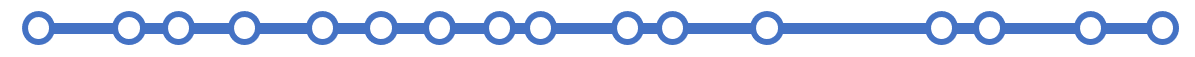

## 4. **RAPTOR Transit Routing Module**
This module is designed to facilitate transit routing using the RAPTOR algorithm, a fast algorithm for public transit routing. The module encompasses two primary functions: identifying sample stops within a walkable threshold and executing the RAPTOR algorithm for transit routing.


### Key Features

1. **Sample Stops Identification**: The module can identify transit stops that are within a walkable distance from the origin and destination points of a sample dataset.
2. **RAPTOR Transit Routing**: Utilizing the RAPTOR algorithm, the module can compute transit routes for a given sample dataset, taking into account various parameters like maximum transfers, walking distance from the source, and change time between routes.

In [ ]:
from program import raptor_run

### Key Libraries and Dependencies

This module is built upon the following packages and the RAPTOR algorithm:
- **Basic Python Libraries**: `os`, `glob`, `psutil`, `itertools`, `argparse`, `numpy`, `pandas`, `pickle`, `math`, `random`, and `time`.
- **Geospatial Libraries**: `geopandas`, `shapely`, and `geopy` for spatial operations and distance calculations.
- **Graph Library**: `networkx` for network-based operations.
- **Progress Bar**: `tqdm` for displaying progress during iterative processes.

### Data Preparation

- **OD Trips Data**
- **Processed GTFS Data**
- **Processed Transfer Data**
- **Prepared Dictionary Files**

In [ ]:
# Define paths for input datasets
SAMP_PATH = './data/sample'
GTFS_PATH = './scratch/gtfs_output'
TRANSFER_PATH = './scratch/transfer_output/transfer.csv'
DICT_PATH = './scratch/dicts'
SAMP_INT_PATH = './scratch/sample_processed'

# Define path for output datasets
SAVE_PATH = './data/output'

### Parameter Set-Up

- **Walk Threshold**: Defines the maximum distance (e.g., 0.5 miles) from an origin or destination point to a transit stop that is considered walkable.
- **RAPTOR Parameters**: Parameters like `MAX_TRANSFER`, `WALKING_FROM_SOURCE`, `CHANGE_TIME_SEC`, and `PRINT_ITINERARY` influence 

In [ ]:
WALK_THRESH = 0.5
DATE_TOFILTER_ON = '20230922'
# RAPTOR parameters
MAX_TRANSFER = 5
WALKING_FROM_SOURCE = 1
CHANGE_TIME_SEC = 600
PRINT_ITINERARY = 1

### The Analysis

#### 1. `find_samp_stops`:
This function identifies transit stops that are within a walkable distance from the origin and destination points of a sample dataset. It uses geospatial operations to buffer around stops and then identifies stops within this buffer for each sample point.

In [ ]:
raptor_run.find_samp_stops(SAMP_PATH, GTFS_PATH, SAMP_INT_PATH, WALK_THRESH)

#### 2. `run_raptor`:
This function executes the RAPTOR algorithm for transit routing. It imports necessary data files, sets up the system, runs the RAPTOR algorithm iteratively for each sample, and then exports the results. The function returns detailed paths, a summary of routes, and a log of the routing process.

In [ ]:
raptor_run.run_raptor(GTFS_PATH, DICT_PATH, TRANSFER_PATH, SAVE_PATH, SAMP_INT_PATH,
                      DATE_TOFILTER_ON, MAX_TRANSFER, WALKING_FROM_SOURCE, CHANGE_TIME_SEC, PRINT_ITINERARY)

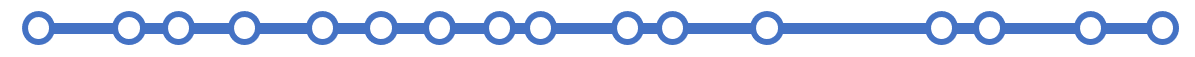

## 5. **Post-Analysis Module**
The Post-Processing Transit Routing Module is a sophisticated tool designed to refine and detail the transit routes obtained from the RAPTOR algorithm. Its primary goal is to provide a granular breakdown of the routes, ensuring that the transit routing results are both rigorous and detailed, making them suitable for further analysis and visualization.


### Key Features

#### **Prepare Route-based Shapefile from GPS Trace**
The `links_transit` function is used to process transit data to craft transit links in shapefiles. By harnessing both raw GTFS (General Transit Feed Specification) data and its processed counterpart, this function paints a spatial portrait of transit routes. Several sub-modules are used:

##### 1. Data Import and Preprocessing
- **`import_data`**: Imports GTFS data files.
- **`sub_sample`**: Subsamples data for large files.

##### 2. Shape Processing
- **`spacing`**: Interpolates additional shape points between adjacent pairs.
- **`back_space`**: Matches shapes to time stops.
- **`filter_mismatched_shapes`**: Filters out misordered shape points.
- **`find_distance`**: Computes travel distances between stops and shape points.

##### 3. Transit Link Generation
- **`space_reg`**: Registers spacing for each trip.
- **`get_transit_links`**: Generates transit links.

##### 4. Data Filling and Correction
- **`fill_links_dist_na`**: Fills missing distances in links.
- **`fill_links_geo_na`**: Fills missing geometries in links.


#### **Transit Data Trajectory Post-Processing**

The `post_proc_traj` function from the `postproc_traj` module is designed to streamline the post-processing of transit data trajectories. It integrates raw transfer data, spatial shapefiles, and GTFS datasets to generate comprehensive transit trajectories. The function allows for customization through parameters like walking thresholds (`walk_thres`) and link versions (`link_version`). The processed trajectories are then saved to the specified `TRAJ_PATH` directory.

##### 1. Data ID Management
- **`update_stop_id`**: Updates stop IDs to ensure consistency between pre-processed and post-processed GTFS datasets.

##### 2. Trajectory Generation
- **`separate_paths_by_mode`**: Segregates paths based on the mode of transportation (riding, walking, waiting), and find wait time and transfers.
- **`find_trajectory`**: Determines the trajectory for each transit riding and walking segment of a trip using the shortest path algorithm, based on network shapefiles generated in the previous section.

##### 3. Spatial Analysis
- **`find_samp_stops`**: Identifies stops for each sample within a specified walking threshold.
- **`revert_walk_to_osm`**: Converts walking paths to OpenStreetMap (OSM) format.

##### 4. Main Post-Processing
- **`post_proc_traj`**: Orchestrates the entire post-processing workflow, integrating walking and riding networks, and saving the results.


#### **Transit Ingress-Egress Trajectory Integration**

Crafted by Fizzy Huiying Fan on May 30, 2022, this module is dedicated to the precise determination and integration of transit ingress and egress trajectoriesI, it seamlessly combines the first and last mile trajectories with the main transit riding segment, ensuring a comprehensive representation of the entire transit journey.

##### 1. Node Filtering
- **`filter_nodes_by_stop`**: Filters nodes based on transit stops and a given threshold. This ensures that only nodes relevant to the transit journey's start and end are considered.

##### 2. Path Determination
- **`shortest_path_finder`**: Employs the Dijkstra algorithm to find the shortest path between two nodes within a set of links, crucial for determining the most efficient ingress and egress paths.
- **`find_f_l_paths`**: Specifically computes the paths for the first and last mile of a transit journey, bridging the gap between transit stops and the main transit route.

##### 3. Trajectory Processing
- **`snap_sample_network`**: Altrips OD igns sample points to a network based on a specified distance threshold, ensuring that transit stops are accurately represented in the trajectory.
- **`f_l_trajectories`**: Calculates the trajectory for each segment of a trip, encompassing the ingress, egress, and the main transit riding segment.
- **`integrate_all_traj`**: Merges different trajectories, including the ingress and egress paths, to form a complete and unified trajectory for each trip.

##### 4. Comprehensive Integration
- **`integrate_ingress_egress`**: A holistic function that oversees the entire trajectory integration process. It ensures that the initial and final walking segments are seamlessly combined with the main transit re transit journey.


### Key Libraries and Dependencies

The module leverages several Python libraries:
- **Standard Libraries**: `os`, `warnings`, `time`, `itertools`, `argparse`, `glob`
- **Data Handling**: `pandas`, `numpy`
- **Geospatial Operations**: `shapely`, `geopandas`, `geopy`
- **Visualization & Progress Tracking**: `tqdm`
- **Network Analysis**: `networkx`
- **Custom Modules**: `program.transit_l, `program.f_l_mile`inks`

A significant portion of the functionalities, especially the transit_links_shp function and its dependencies, are derived from TransitSim 3.0. This program, developed by the same asuthor in an earlier project, provides foundational tools for transit simulation and analysis.` The post_proc`_traj function, on the other hand, introduces new functionalities developed specifically for this mo The `integrate_ingress_egress` function introduces the methods to derive trajectories during transit ingress and egress, and integrate them to complete the trip trajectory.dule.

In [ ]:
from program import postproc_traj

### Data Preparation

The module mainly uses data outputs from the previous modules. It uses several directories to manage its data:
- **RAW_GTFS_PATH**: './data/gtfs' - Directory containing raw GTFS data.
- **PROC_GTFS_PATH**: './scratch/gtfs_output' - Directory for processed GTFS data.
- **SHP_PATH**: './data/postproc/linkshp' - Directory for shapefiles.
- **RAW_TRANSFER_PATH**: './data/transfer_network' - Directory for raw transfer data.
- **OUTPUT_PATH**: './data/output' - Directory for output data.
- **TRAJ_PATH**: './data/postproc/trajectories' - Directory for trajectory data.
- **SAMP_INT_PATH**: './scratch/sample_processed' - Stores all teh intermittent processed sample trips file
- **NEW_TRAJ_PATH**: './data/postproc/traj_integrated' - Final trip trajectories with ingress and egress integrated

In [ ]:
PROC_GTFS_PATH = './scratch/gtfs_output'
RAW_GTFS_PATH = './data/gtfs'
SHP_PATH = './data/postproc/linkshp'
RAW_TRANSFER_PATH = './data/transfer_network'
OUTPUT_PATH = './data/output'
TRAJ_PATH = './data/postproc/trajectories'
SAMP_INT_PATH = './scratch/sample_processed'
NEW_TRAJ_PATH = './data/postproc/traj_integrated'
F_L_PATH = './scratch/f_l_path'

### Parameters Set Up

This module uses a variety of parameters to control 

##### 1. `buff_dist`
- **Description**: Buffer distance used in spatial operations.
- **Type**: Numeric (typically representing meters or other distance units).

##### 2. `space_count`
- **Description**: The count or number of spaces for interpolation in the spacing function.
- **Type**: Integer.

##### 3. `min_true_screen`
- **Description**: Minimum true screening value used to filter mismatched shapes.
- **Type**: Integer.

##### 4. `max_space_tol`
- **Description**: Maximum spacing tolerance used in the back_space function to determine the maximum allowable distance.
- **Type**: Numeric (typically representing a ratio or percentage).

##### 5. `plot_links`
- **Description**: (Note: This parameter isn't explicitly defined in the provided code. Assuming it's used elsewhere in the module) Likely a Boolean indicating whether to plot or visualize the transit links.
- **Type**: Boolean (`True` or `False`).

##### 6. `spatial_filtered`
- **Description**: Boolean indicating if spatial filtering is applied during data import.
- **Type**: Boolean (`True` or `False`).

##### 7. `activate_subsample`
- **Description**: (Note: This parameter isn't explicitly defined in the provided code. Assuming it's used elsewhere in the module) Likely a Boolean indicating whether to activate subsampling of the data.
- **Type**: Boolean (`True` or `False`).

##### 8. `walk_thres`
- **Description**: Threshold for walking distance, typically used to determine the maximum allowable walking distance between transit stops or between a stop and a destination.
- **Type**: Numeric (typically representing miles or other distance units).

##### 9. `link_version`
- **Description**: Specifies the version of the link data to be used, which can be either 'raw' or 'processed'.
- **Type**: String (e.g., 'raw' or 'proces

##### 10. `snap_dist`
- **Description**: Distance threshold used to snap sample points to the nearest node in the network. It helps in aligning transit stops or points to the closest network nodes.
- **Type**: Numeric (typically representing miles or other distance units).

##### 11. `dict_speed`
- **Description**: A dictionary that defines the speed for various modes of transportation. It provides a mapping between transit modes (e.g., 'auto', 'bike', 'walk') and their respective speeds.
- **Type**: Dictionary (Key: String representing the mode of transportation, Value: Numeric representing speed in miles per hour or other speed units).


In [ ]:
# space-reg 
buff_dist = 30
space_count = 10
min_true_screen = 3
max_space_tol = 1 
# control for links generation
plot_links = True
spatial_filtered = True
activate_subsample = False
# parameters for trajectories
walk_thres = 0.21
link_version = 'processed'
# parameters for ingress and egress
snap_dist=0.5
dict_speed=None

### The Analysis

#### **Generate Precise GPS Trajectory**
* The section can generate a precise GPS trajectory for each route.
* Outputs the results as a shapefile, ensuring the trajectory is accurate and suitable for visualization and further spatial analysis.
* Utilizes rigorous programming techniques to ensure precision.

In [ ]:
links_transit = postproc_traj.transit_links_shp(RAW_GTFS_PATH, PROC_GTFS_PATH, SHP_PATH,
                                                route_map_db, 
                                                buff_dist, space_count, min_true_screen, max_space_tol,
                                                plot_links, spatial_filtered, activate_subsample)

In [ ]:
import geopandas as gpd
(gpd.GeoDataFrame(links_transit, 
                  geometry=links_transit['geometry'])
 .set_crs('EPSG:2163')
 .to_crs('EPSG:4269')
 .plot())

#### **Detailed Trajectory Post-Processing**
Takes the RAPTOR data and performs several tasks:
* **Mode Separation**: Differentiates the trajectory based on modes such as walking and riding.
* **Wait Time Calculation**: Determines the waiting duration for each segment of the trip.
* **Transfer Analysis**: Identifies and calculates transfer times between different modes or routes.
* **Detailed Mode Retrieval**: Retrieves the specific trajectory for each mode, especially walking and transit, ensuring each segment is accurately represented.
* **Segmented Output**: Outputs the trajectory segment by segment for each trip, allowing for granular analysis.

In [ ]:
postproc_traj.post_proc_traj(RAW_TRANSFER_PATH, SHP_PATH, OUTPUT_PATH, RAW_GTFS_PATH, PROC_GTFS_PATH, TRAJ_PATH, walk_thres, link_version)

#### **Transit Ingress-Egress Trajectory Integration**

The core objectives of this module encompass:

* **Node Filtering**: The ability to discern and filter nodes based on specific transit stops and a designated threshold, ensuring relevance in the transit journey's context.
* **Shortest Path Determination**: Within a provided set of links, the module can pinpoint the most efficient path between two nodes, utilizing the Dijkstra algorithm.
* **Sample Network Snapping**: By employing the `snap_sample_network` function, sample points are aligned to a network according to a specified distance threshold, ensuring accurate representation of transit stops.
* **First and Last Mile Path Identification**: The module is adept at computing paths for the initial and concluding segments of a transit journey, bridging the gap between transit stops and the main transit route.
* **Trajectory Calculation**: For each segment of a trip, be it ingress, egress, or the main transit riding segment, the module can meticulously calculate the trajectory.
* **Unified Trajectory Integration**: A standout feature is the module's capability to amalgamate diverse trajectories, integrating the ingress and egress paths to form a comprehensive trajectory for each trip.

In [ ]:
postproc_traj.integrate_ingress_egress(RAW_TRANSFER_PATH, PROC_GTFS_PATH, SAMP_INT_PATH, TRAJ_PATH, 
                                       NEW_TRAJ_PATH, F_L_PATH, 
                                       snap_dist, dict_speed)

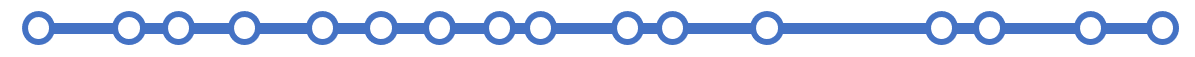

## 6. **Extensions**
The extension modules are fully optional, but can provide functionalities that might be helpful for certain users. 

There are a number of extension moudules in TransitSim 4.0, including:
* **Generating second by second trip trajectory**: produce second by second trip trajectory for each trip, good for emission analysis, exposure analysis, etc.
* **Shapefile output for GTFS data**: outputs shapefiles of GTFS for visualization and all sorts of analysis.
* **Shapefile output for model output**: outputs shapefiles for the transit modeling results.
* **Interagency modeling**: download, process, and integrate transit data from multiple agencies and conduct inter-agency, multiple-period analyses.
* **Park-and-ride Integration**: extract and process park and ride information from transit agencies involved and integrate with RoadwaySim modeling (park and ride transit).
* **Visualization**: produces trip-level visualization of travel trajectories.
* **Parallel Computing**: conduct parallel computing for large datasets.

In this workshop, we will introduce one of them: **Generating second by second trip trajectory**

In [ ]:
from program import extensions

The module will use some of the data from the previous outputs:

In [ ]:
PROC_GTFS_PATH = './scratch/gtfs_output'
TRANSIT_NETWORK_PATH = './data/postproc/linkshp/transit_links.shp'
TRANSFER_NETWORK_PATH = './data/transfer_network/edges.shp'
NETWORK_PTS_PATH = './data/postproc/linkpts'
NEW_TRAJ_PATH = './data/postproc/traj_integrated'
SEC_TRAJ_PATH = './data/postproc/traj_sec_by_sec'

In generating travel trajectories in points, the model needs to know the granularity that you want the point sampling being conducted (in meters). Typically, for integration with open-source aerial images, 30 meters is a good distance.

In [ ]:
distance_delta = 30 

**Analysis: converting transit and transfer links to point features**

In [ ]:
extensions.sampling_points_from_network(TRANSIT_NETWORK_PATH, TRANSFER_NETWORK_PATH, NETWORK_PTS_PATH, distance_delta)

**Analysis: generating second-by-second trajectories for each trip**

In [ ]:
extensions.traj_second_by_second(PROC_GTFS_PATH, NETWORK_PTS_PATH, NEW_TRAJ_PATH, SEC_TRAJ_PATH)